# 통계학

## 기술 통계

In [4]:
# 공통 코드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager,rc

if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()

	rc('font',family=font_name)

	

# 그래프에 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus']=False

### 명목척도
####  데이터 읽어와서 특성 파악 - decsriptive

In [5]:
university=pd.read_csv('./data/descriptive.csv')
university

,resident,gender,age,level,cost,type,survey,pass
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
295,1.0,5,48,2.0,7.1,1.0,NaN,2.0
296,3.0,1,55,3.0,6.1,1.0,NaN,2.0
297,4.0,1,51,1.0,5.5,1.0,NaN,NaN
298,3.0,0,50,1.0,5.1,1.0,3.0,1.0


In [10]:
# gender - 성별 구별
# 명목척도이기 때문에 통계량 의미가 없고, 구성비율만 의미를 가짐.
print(university.describe())
print(university['gender'].value_counts()) 
# =>  이상치를 탐지할 수 있다. 
# 이상치가 존재하면 범주형 데이터에서는 제거를 하는 경우가 많고 수치형 데이터의 경우는 정규화나 표준화를 이용해 숫자의 범위를 조정하는 경우가 많다. 

university_gender=university[(university['gender']==1) |(university['gender']==2) ] # 연산자의 우선순위 때문에 양쪽에 괄호를 이용하자
print(university_gender['gender'].value_counts())

         resident      gender         age       level        cost        type  \
count  279.000000  300.000000  300.000000  287.000000  271.000000  274.000000   
mean     2.232975    1.420000   53.880000    1.836237    8.722878    1.281022   
std      1.483551    0.545826    6.813247    0.791792   68.970799    0.474096   
min      1.000000    0.000000   40.000000    1.000000 -457.200000    1.000000   
25%      1.000000    1.000000   48.000000    1.000000    4.400000    1.000000   
50%      2.000000    1.000000   53.000000    2.000000    5.400000    1.000000   
75%      3.000000    2.000000   60.000000    2.000000    6.300000    2.000000   
max      5.000000    5.000000   69.000000    3.000000  675.000000    4.000000   

           survey        pass  
count  187.000000  279.000000  
mean     2.593583    1.433692  
std      0.975816    0.496474  
min      1.000000    1.000000  
25%      2.000000    1.000000  
50%      3.000000    1.000000  
75%      3.000000    2.000000  
max      5.000

#### 시각화

<Axes: >

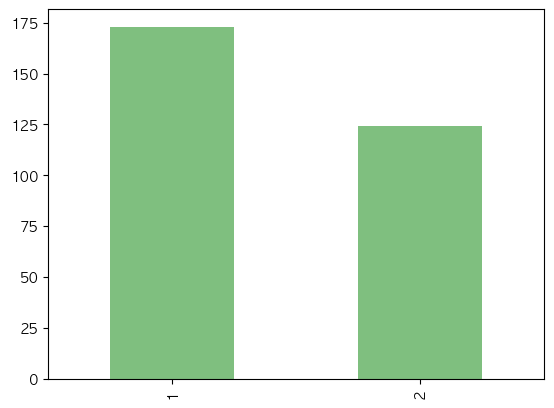

In [18]:
# 성별 비율을 시각화 - 막대나 파이차트를 이용해 시각화
university_gender['gender'].value_counts().plot.bar(color='g',alpha=0.5)

### 순서척도

1.0    115
2.0     99
3.0     70
Name: level, dtype: int64


<Axes: >

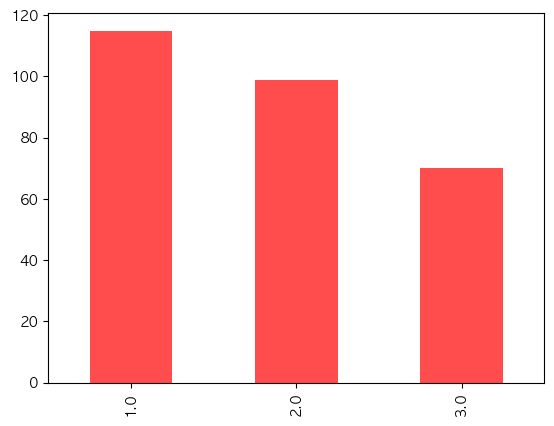

In [19]:
print(university_gender['level'].value_counts())
university_gender['level'].value_counts().plot.bar(color='r',alpha=0.7)

### 등간척도

count    185.000000
mean       2.589189
std        0.980180
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: survey, dtype: float64


<Axes: ylabel='survey'>

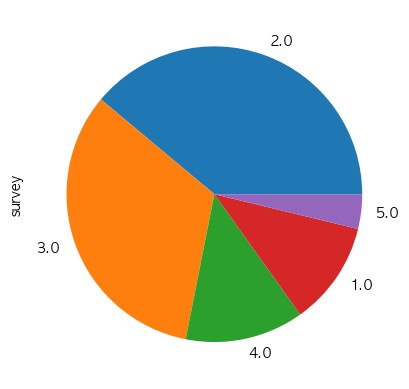

In [22]:
# 등간 척도라 요약 통계량과 구성 비율도 의미를 가짐. 
print(university_gender['survey'].describe())
university_gender['survey'].value_counts().plot.pie()

### 비율 척도

In [ ]:
print(university_gender['cost'].describe())
# 값의 종류가 너무 많다. 
# 비율 척도는 직접 적는 형태가 되므로 이상치나 결측치의 발생 확률이 높다. 
# UI 를 만들 때 다른 척도에 비해서 주의를 기울여야 한다. 
university_gender['cost'].value_counts()
# 값의 분포 범위가 너무 넓다.

In [47]:
# 일반적 생활비 - 2~10 으로 설정. 
cost=university_gender['cost']
print(cost[(cost>=2)&(cost<=10)].describe())
print(cost[(cost>=2)&(cost<=10)].value_counts())

count    248.000000
mean       5.354032
std        1.138783
min        2.100000
25%        4.600000
50%        5.400000
75%        6.200000
max        7.900000
Name: cost, dtype: float64
5.0    18
6.3    16
4.0    15
6.0    14
6.2    13
6.4    11
5.1    10
4.1     9
5.2     9
5.5     8
6.1     8
6.7     8
5.3     7
3.0     6
5.7     6
4.7     6
4.6     5
4.3     5
5.8     5
5.4     5
3.5     5
5.6     4
6.9     4
4.9     4
6.5     4
4.4     4
6.8     4
7.7     4
3.8     3
3.9     3
7.0     3
4.2     3
7.1     3
3.4     2
3.3     2
7.2     2
5.9     2
4.8     2
2.3     2
7.9     2
2.1     1
4.5     1
Name: cost, dtype: int64


[nan nan nan] [0.         0.33333333 0.66666667 1.        ] <BarContainer object of 3 artists>


/Users/kimjimin/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


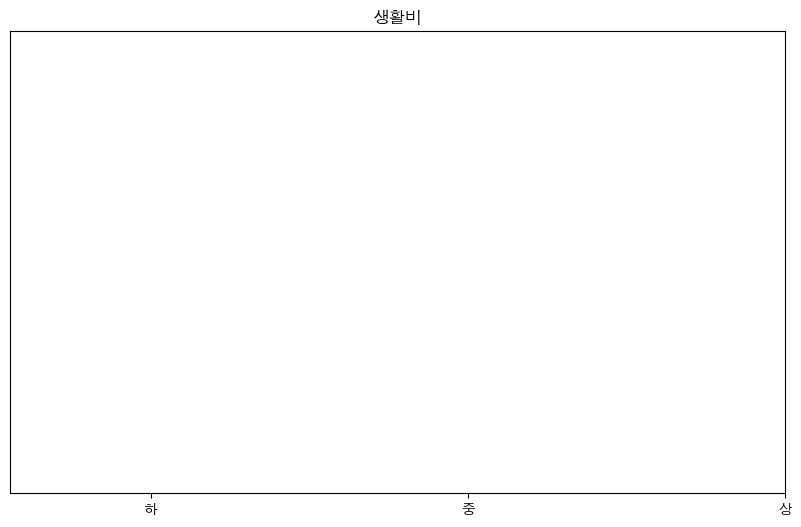

In [46]:
# 시각화 크기 영역 설정
plt.figure(figsize=(10,6))
ys,xs,patches=plt.hist(cost[(cost>=2)&(cost<=10)],bins=3,# 구간의 개수
                       density=True, # 백분율 여부 설정
                        cumulative=False, # 누적 여부
                        histtype='bar', # step 도 있음 -> 안에 비운 막대
                        orientation='vertical', # 방향
                        rwidth=0.8,
                        color='hotpink'
                        )
print(ys,xs,patches)
# y축 제거
plt.yticks([])
plt.xticks([xs[i]+xs[i+1]/2 for i in range(0,len(xs)-1)],['하','중','상'])
plt.title("생활비")
plt.show()

In [48]:
cost=cost[(cost>=1)&(cost<=10)]
# 구간화 진행
cost[(cost>=1)&(cost<=3)]=1
cost[(cost>=3)&(cost<=6)]=2
cost[(cost>=6)&(cost<=10)]=3

cost=cost.astype(int) # 정수형 변경.

0      2
1      2
2      2
3      2
4      2
      ..
293    2
294    2
296    3
297    2
299    2
Name: cost, Length: 249, dtype: int64


2    157
3     82
1     10
Name: cost, dtype: int64


([<matplotlib.patches.Wedge at 0x14e6a2f10>,
 [Text(-0.4385178605790923, 1.0088122154063837, '하'),
  Text(0.30808939197115837, -1.0559739232361953, '중'),
  Text(1.0912564425616536, -0.13841739980105278, '상')],
 [Text(-0.2391915603158685, 0.5502612084034819, '63.1%'),
  Text(0.16804875925699547, -0.575985776310652, '32.9%'),
  Text(0.595230786851811, -0.07550039989148331, '4.0%')])

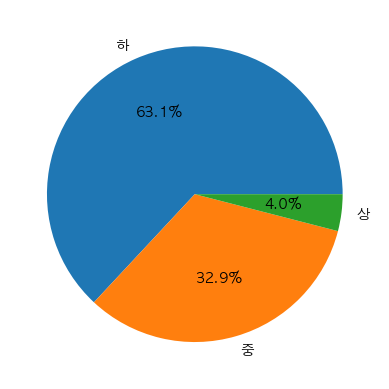

In [50]:
print(cost.value_counts())
plt.pie(cost.value_counts(),labels=['하','중','상'],autopct='%1.1f%%')

## 데이터의 특성

### 평균값

In [54]:
import math

s=pd.Series([10,11,10.78])
print("평균 성장률",s.pct_change().mean()) # 산술 평균
print(10*1.040000000000000036*1.040000000000000036)

# 기하 평균
print('기하평균',math.sqrt((11/10)*(10.78/11)))
a=math.sqrt((11/10)*(10.78/11))
print(10*a*a)

평균 성장률 0.040000000000000036
10.816
기하평균 1.0382677881933928
10.78


### 중앙값

In [58]:
tdata=pd.read_csv('./data/tdata.csv',encoding='cp949')
tdata

print('평균',tdata['성적'].mean())
print('중앙값',tdata['성적'].median())

평균 77.1
중앙값 77.5


In [60]:
# 절사평균을 구하기 위한 패키지
from scipy import stats
 # 상위 0.05, 하위 0.05 에 해당하는 데이터를 제거하고 평균 구하기.
print('절사평균 : ',stats.trim_mean(tdata['성적'],0.1))

절사평균 :  77.0


### 가중평균이나 가중 중앙값 구하기

In [63]:
state=pd.read_csv('./data/state.csv')
# 각 주의 이름, 인구, 약자, 살인사건 발생 비율 데이터
# murder.Rate 의 평균을 바로 구하는것은 인구에 대한 가중치를 부여하지 않았기 떄문에 결과가 왜곡될 수 있다. 
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [72]:
# 가중 중앙값 과 가중 평균 구하기
print('평균',state['Murder.Rate'].mean())
print('median',state['Murder.Rate'].median())

import wquantiles
print('인구의 가중치를 부여한 평균 : ',np.average(state['Murder.Rate'],weights=state['Population']))
print('인구의 가중치를 부여한 평균 : ',wquantiles.median(state['Murder.Rate'],weights=state['Population']))

Traceback (most recent call last):
  File "/Users/kimjimin/anaconda3/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 945, in trace_dispatch
    self.do_wait_suspend(thread, frame, event, arg)
  File "/Users/kimjimin/anaconda3/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 164, in do_wait_suspend
    self._args[0].do_wait_suspend(*args, **kwargs)
  File "/Users/kimjimin/anaconda3/lib/python3.11/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/kimjimin/anaconda3/lib/python3.11/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

## 데이터의 확인

In [74]:
state=pd.read_csv('./data/state.csv')
print(state['Murder.Rate'].quantile([0.05,0.25,0.50,0.75,0.95]))


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


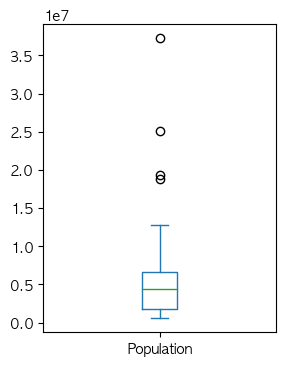

In [77]:
# 녹색 선이 50% 성자의 양 끝선이 25%와 75% 에 해당하는 값
# 수염의 하위 끝은 Q1-IQR*1.5
# 가장 일반적인 이상치 검사 방법이 수염 외부에 있는 값을 이상치로 간주하는 것. 
ax=(state['Population'].plot.box(figsize=(3,4)))
plt.show()

### 도수분포표

In [82]:
# population 을 10개의 그룹으로 분할한 후 개수 구하기
binnedPopulation=pd.cut(state['Population'],10)

# 그룹별로 데이터의 개수를 가지고 정렬해서 출력
# print(binnedPopulation.value_counts())

# 각 구간에 속한 주 이름을 같이 출력
binnedPopulation.name='binnedPopulation'
df=pd.concat([state,binnedPopulation],axis=1)
# print(df)
df=df.sort_values(by='Population')
# print(df)

groups=[]
# 인구의 하한과 상한으로 그룹화해서 필드를 생성. 
for group,subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange':group,
        'Count':len(subset),
        'State':'.'.join(subset.Abbreviation)
	})
pd.DataFrame(groups) 

,BinRange,Count,State
0,"(526935.67, 4232659.0]",24,WY.VT.ND.AK.SD.DE.MT.RI.NH.ME.HI.ID.NE.WV.NM.N...
1,"(4232659.0, 7901692.0]",14,KY.LA.SC.AL.CO.MN.WI.MD.MO.TN.AZ.IN.MA.WA
2,"(7901692.0, 11570725.0]",6,VA.NJ.NC.GA.MI.OH
3,"(11570725.0, 15239758.0]",2,PA.IL
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


### 상대도수 누적도수

In [92]:
# 상대 도수와 누적 도수 출력
scores=pd.read_csv('./data/scores_em.csv',index_col='student number')
# print(scores)

# 영어 점수 꺼내기
english_scores=np.array(scores['english'])
# 0~100 까지의 10개의 구간으로 나누어서 개수 파악
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
# print(freq)
freq_class=[f'{i}~{i+10}'for i in range(0,100,10)]
# print(freq_class)

# 문자열과 데이터 개수를 가지고 DF 만들기
freq_dist_df=pd.DataFrame({'frequency':freq},index=pd.Index(freq_class,name='class'))


# 상대도수 만들기
rel_freq=freq/freq.sum()
print(rel_freq)

# 누적 상대 도수 만들기
cum_rel_freq=np.cumsum(rel_freq)
print(cum_rel_freq)

freq_dist_df['상대도수']=rel_freq
freq_dist_df['누적상대도수']=cum_rel_freq

freq_dist_df


[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]
[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


,frequency,상대도수,누적상대도수
class,,,
0~10,0,0.00,0.00
10~20,0,0.00,0.00
20~30,0,0.00,0.00
30~40,2,0.04,0.04
40~50,8,0.16,0.20
50~60,16,0.32,0.52
60~70,18,0.36,0.88
70~80,6,0.12,1.00
80~90,0,0.00,1.00


### histogram

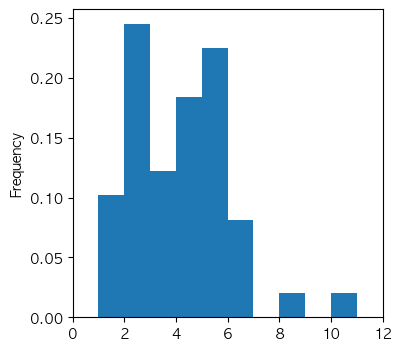

In [97]:
# 히스토 그램. 
ax=state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12),figsize=(4,4))
plt.show()

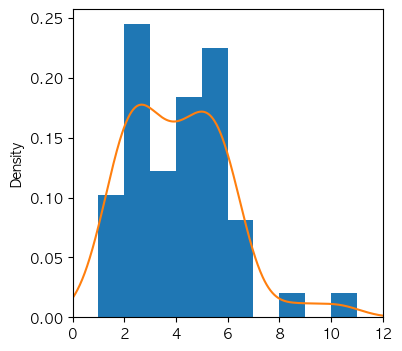

In [100]:
# 밀도 추정 - 히스토그램 보다 부드럽게 곡선으로 데이터의 분포를 시각화
ax=state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12),figsize=(4,4))
state['Murder.Rate'].plot.density(ax=ax)
plt.show()

# 다변량 분석

## 교차 분석

In [114]:
university=pd.read_csv('./data/descriptive.csv')
# print(university.head())
# cost 열 제거
university.drop('cost',axis=1,inplace=True)

# gender 대신 남자 여자로 변경한 컬럼을 추가
university['성별']='남자'
idx=0
for val in university['gender']:
    if val==2:
        university['성별'][idx]='여자'
    idx+=1
university.drop('gender',axis=1,inplace=True)
# print(university.head())
university['학력']='응답없음'
idx=0
for val in university['level']:
    if val==1.0:
        university['학력'][idx]='고졸'
    elif val==2.0:
        university['학력'][idx]='대졸'
    else:
        university['학력'][idx]='대학원졸'
    idx+=1
university.drop('level',axis=1,inplace=True)

university['합격여부']='응답없음'
idx=0
for val in university['pass']:
    if val==1.0:
        university['합격여부'][idx]='합격'
    elif val==2.0:
        university['합격여부'][idx]='불합격'
    idx+=1
university.drop('pass',axis=1,inplace=True)

# 응답 없음 제거
university=university[(university['합격여부']=='합격')|(university['합격여부']=='불합격')]


# 합격과 학력에 대한 교차 분핦표
print(pd.crosstab(university['학력'],university['합격여부']))




합격여부  불합격  합격
학력           
고졸     49  60
대졸     35  58
대학원졸   37  40


/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_54153/3855682382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx]='여자'
/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_54153/3855682382.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx]='고졸'
/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_54153/3855682382.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 두 데이터를 나타내는 지표
* cov
* cor

In [116]:
mpg=pd.read_csv('./data/auto-mpg.csv',header=None)
mpg.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


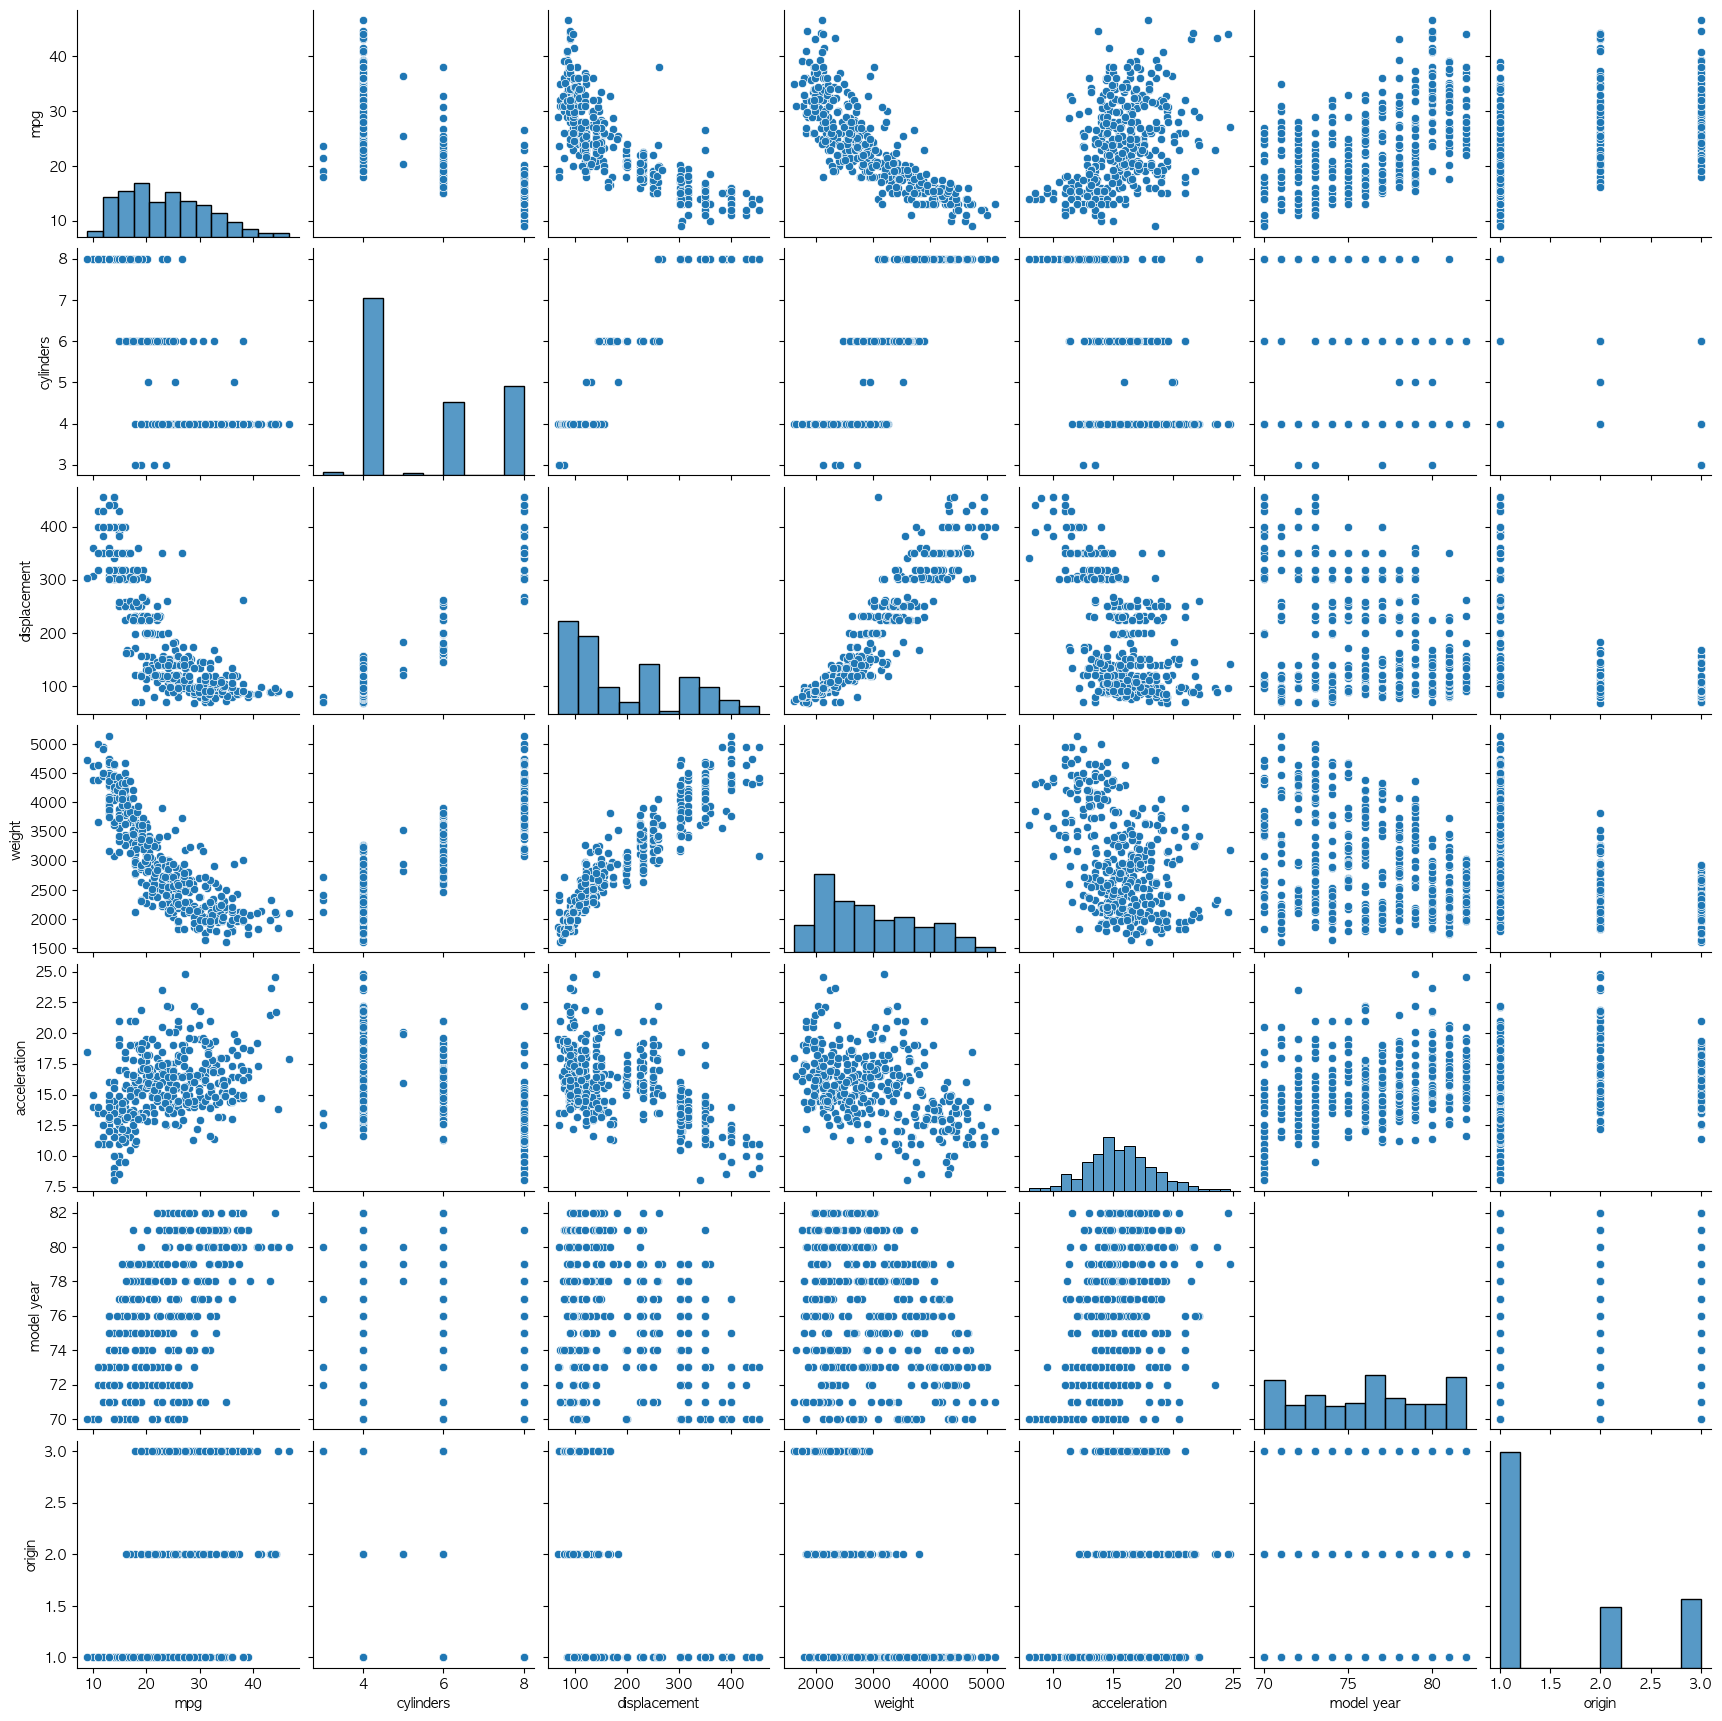

In [117]:
import seaborn as sns
sns.pairplot(mpg)

In [118]:
# 모든 숫자 컬럼의 상관계수 확인
print(mpg.corr())

# 이 경우 mpg 에 대한 회귀분석을 할 떈 차원 축소나 제거를 고려
# 실린더와 displacement 가 상관계수가 높아서 아주 강한 상관관계를 가지고 있다. 
# 상관관계를 가지고 있는 피쳐들을 이용해 부넛ㄱ -> 다중 공선성 문제. 

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_54153/799302165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mpg.corr())


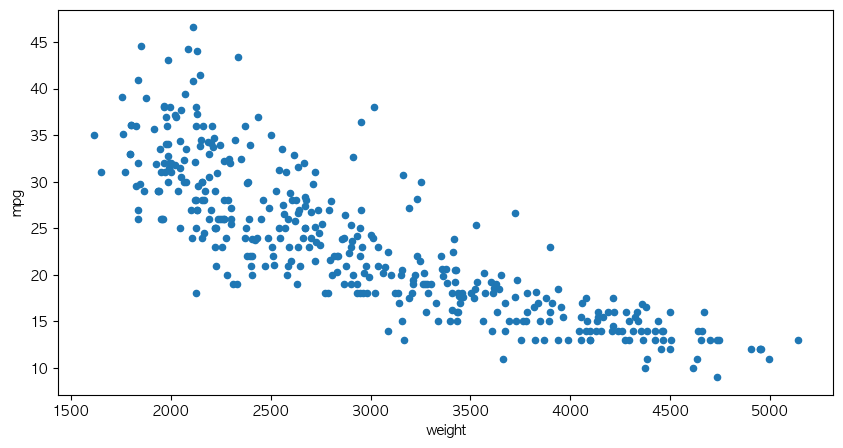

In [119]:
mpg.plot(kind='scatter',x='weight',y='mpg',figsize=(10,5))
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

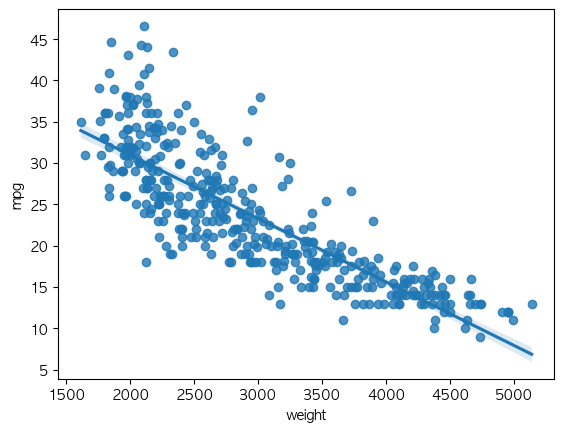

In [121]:
# 회귀선과 분포를 확인
sns.regplot(x='weight',y='mpg',data=mpg)

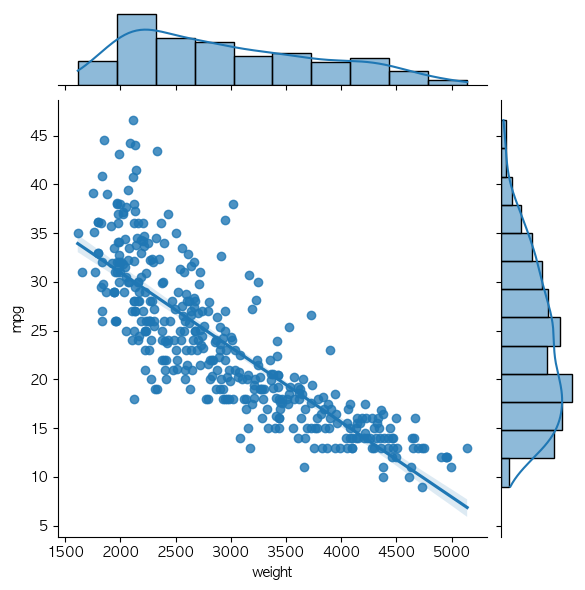

In [122]:
sns.jointplot(x='weight',y='mpg',kind='reg',data=mpg)

In [125]:
mpg.corr() # 모든 컬럼의 상관계수를 구하는데 horsepower 는 나오지 않는다. -> 자료형 확인.
# horsepower - object -> ? 가 존재

mpg['horsepower'].replace('?',np.nan,inplace=True)
mpg.dropna(subset=['horsepower'],axis=0,inplace=True)
mpg['horsepower']=mpg['horsepower'].astype('float')

print(mpg.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_54153/3159811290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr() # 모든 컬럼의 상관계수를 구하는데 horsepower 는 나오지 않는다. -> 자료형 확인.
/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_54153/3159811290.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mpg.corr())


## 유의 확률 : 우연히 이렇게 나올 확률

In [126]:
import scipy as sp
result=sp.stats.pearsonr(mpg['mpg'].values,mpg['horsepower'].values)
print(result)

PearsonRResult(statistic=-0.7784267838977776, pvalue=7.0319890293952315e-81)


## 앤스콤데이터

In [133]:
# 앤스콤데이터 가져오기
import statsmodels.api as sm
data=sm.datasets.get_rdataset('anscombe')
df=data.data
# 데이터 확인
# df

for i in range(1,5):
    print(df[[f'x{i}',f'y{i}']].corr())
    
for i in range(1,5):
	result=sp.stats.pearsonr(df[f'x{i}'].values,df[f'y{i}'].values)
	print(result)

          x1        y1
x1  1.000000  0.816421
y1  0.816421  1.000000
          x2        y2
x2  1.000000  0.816237
y2  0.816237  1.000000
          x3        y3
x3  1.000000  0.816287
y3  0.816287  1.000000
          x4        y4
x4  1.000000  0.816521
y4  0.816521  1.000000
PearsonRResult(statistic=0.8164205163448399, pvalue=0.002169628873078792)
PearsonRResult(statistic=0.8162365060002426, pvalue=0.0021788162369108105)
PearsonRResult(statistic=0.816286739489598, pvalue=0.0021763052792280416)
PearsonRResult(statistic=0.8165214368885028, pvalue=0.0021646023471972226)


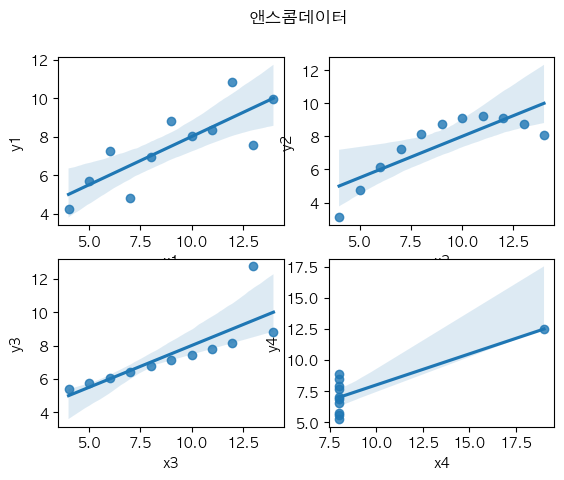

In [135]:
for i in range(1,5):
	num=220+i
	plt.subplot((num))
	sns.regplot(x=f'x{i}',y=f'y{i}',data=df)
plt.suptitle("앤스콤데이터")
plt.show()

## 스피어만 상관계수

In [141]:
s1=pd.Series([1,2,3,4,5,6])
s2=pd.Series([i**2 for i in s1])
p1=pd.Series([1,2,3,4,5,6])
p2=pd.Series([1,1,2,3,5,8])

print('피어슨상관계수:',s1.corr(s2))
print('피어슨상관계수:',p1.corr(p2))
print('피어슨 상관계수',sp.stats.pearsonr(s1,s2))


print('스피어만상관계수:',s1.corr(s2,method='spearman'))
print('스피어만상관계수:',p1.corr(p2,method='spearman'))
print('스피어만 상관계수',sp.stats.spearmanr(s1,s2)) # 순위로만 보니까 상관계수 값이 1 이 되버린다. ( 순위가 s1,s1 가 같다. )


피어슨상관계수: 0.9789172636778181
피어슨상관계수: 0.9389529557231421
피어슨 상관계수 PearsonRResult(statistic=0.978917263677818, pvalue=0.0006620372102587687)
스피어만상관계수: 1.0
스피어만상관계수: 0.9856107606091623
스피어만 상관계수 SignificanceResult(statistic=1.0, pvalue=0.0)


## 켄달 상관계수
- 경향을 보는 상관계수

In [144]:
print("켄달상관계수",s1.corr(s2,method='kendall'))
print("켄달상관계수",sp.stats.kendalltau(s1,s2))

켄달상관계수 0.9999999999999999
켄달상관계수 SignificanceResult(statistic=0.9999999999999999, pvalue=0.002777777777777778)


# 육각형 그래프와 등고선


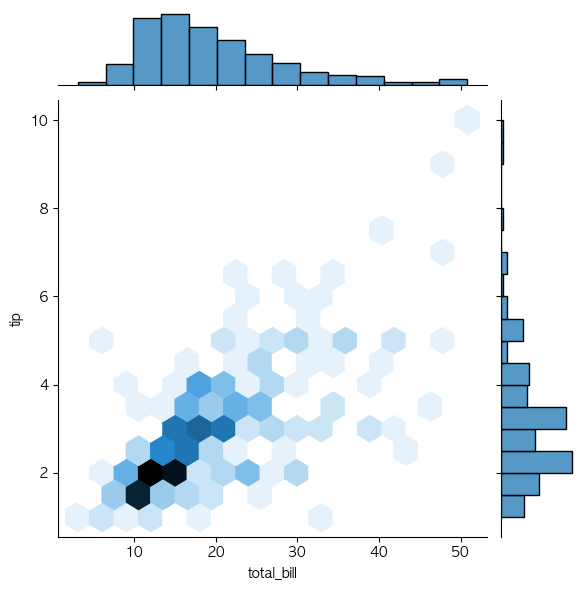

In [146]:
tips=sns.load_dataset('tips')
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

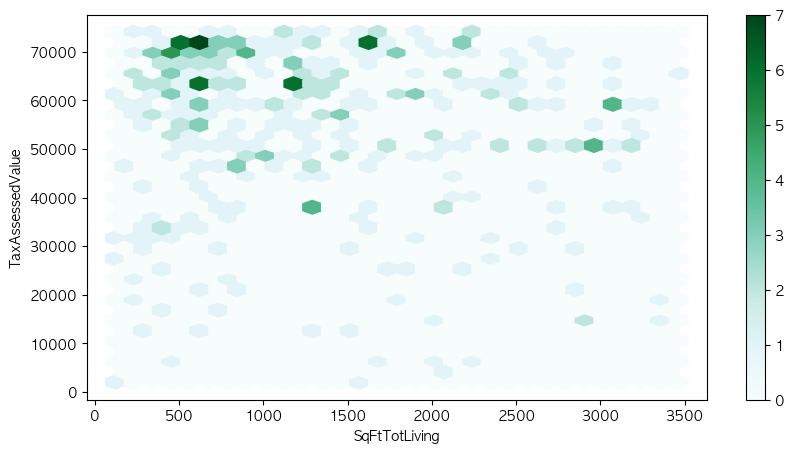

In [150]:
kc_tax=pd.read_csv('./data/kc_tax.csv.gz')
kc_tax0=kc_tax.loc[(kc_tax['TaxAssessedValue']<75000)&(kc_tax['SqFtTotLiving']>100)&
                   (kc_tax['SqFtTotLiving']<3500)]

ax=kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue',gridsize=30,sharex=False,figsize=(10,5))
plt.show()

### 등고선

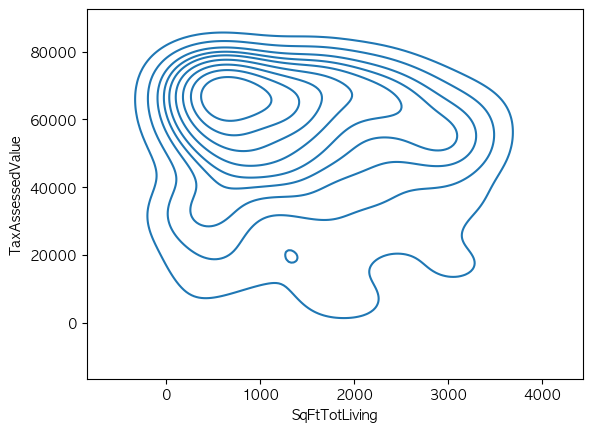

In [152]:
sns.kdeplot(data=kc_tax0,x='SqFtTotLiving',y='TaxAssessedValue')
plt.show()